# Demonstration: QCNN algorithm

In [1]:
import pennylane as qml
from pennylane import numpy as np
import jax
import jax.numpy as jnp
from jax import jit
from functools import partial

from matplotlib import pyplot as plt

import copy
import tqdm  # Pretty progress bars
import joblib  # Writing and loading
from noisyopt import minimizeSPSA

import multiprocessing

import sys
sys.path.insert(0, '../')
import vqe as vqe
import qcnn as qcnn
##############

In [2]:
N = 8

In [3]:
# Load data and separate in training and test set
data = joblib.load('../data/vqeN'+str(N)+'.job')

train_index = np.sort(np.concatenate((np.random.choice(np.arange(int(0.2*len(data))), 15, replace = False), np.random.choice(np.arange(int(0.8*len(data)),len(data)), 15, replace = False)  )))

X_train, Y_train = [], []
X_test, Y_test   = [], []
X, Y             = [], []
for i in range(len(data)): 
    if i in train_index:
        X_train.append(data[i][0])
        Y_train.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
    else:
        X_test.append(data[i][0])
        Y_test.append(data[i][1])
        X.append(data[i][0])
        Y.append(data[i][1])
        
X_train, Y_train = jnp.array(X_train), jnp.array(Y_train)
X_test, Y_test   = jnp.array(X_test), jnp.array(Y_test)
X, Y             = jnp.array(X), jnp.array(Y)

print('DATA:')
print('______________________________')
print('Size of Data Set: {0}'.format(len(data)))
print('Size of Training Set: {0}'.format(np.shape(X_train)[0]))
print('Size of Test Set    : {0}'.format(np.shape(X_test)[0]))

DATA:
______________________________
Size of Data Set: 100
Size of Training Set: 30
Size of Test Set    : 70


Cost: 0.06253250688314438: 100%|█████████| 10000/10000 [00:34<00:00, 288.27it/s]


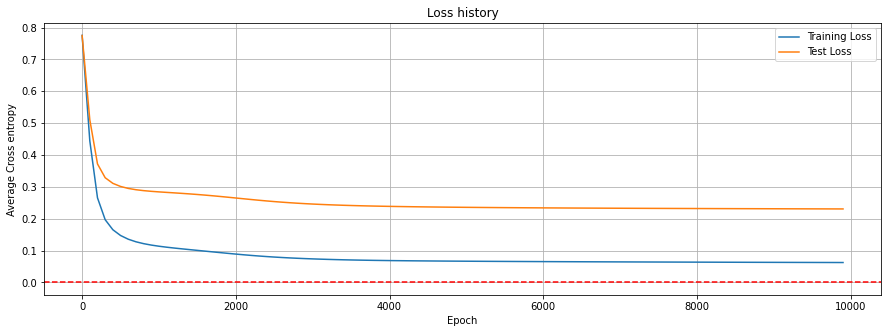

In [4]:
params = qcnn.train(0.03, 10000, N, vqe.vqe_circuit, qcnn.qcnn_circuit, X_train, Y_train, X_test, Y_test, circuit = True, plot = True)

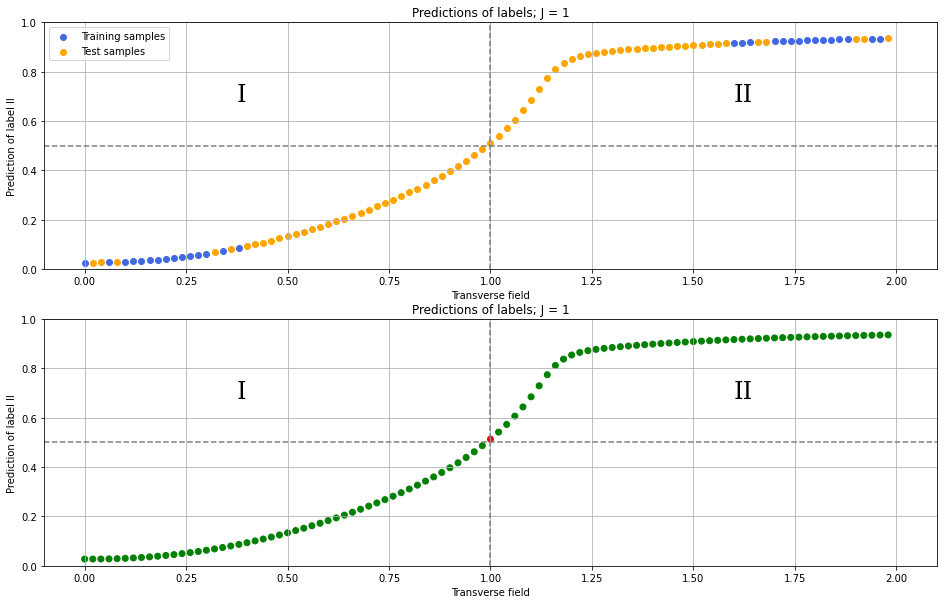

In [5]:
qcnn.plot_results(X, Y, train_index, params, N, vqe.vqe_circuit, qcnn.qcnn_circuit)